In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib widget
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

from data_constructor import DataConstructor
from modules.data_visualizer import DataVisualizer
from modules.data_processing import DataProcessor
from modules.models import TimePeriod, PreprocessingParams, DiffParams

## Constructing data
- Fetching from database
- Filling gaps in data

df_1 - preprocessed using log, derative and std normalization \
df_2 - preprocessed using log and derative \
df_3 - preprocessed only using log

In [3]:
dc = DataConstructor()

time_period = TimePeriod(dt_from=dt.datetime(2022, 1, 1), dt_to=dt.datetime(2023, 1, 1))

df_1, tickers_1 = dc.construct_df(time_period, filter_stablecoins=True)

proc_params = PreprocessingParams(std=False)
df_2, tickers_2 = dc.construct_df(time_period, preprocessing_params=proc_params, filter_stablecoins=True)

proc_params = PreprocessingParams(diff=DiffParams(is_true=False), std=False)
df_3, tickers_3 = dc.construct_df(time_period, preprocessing_params=proc_params, filter_stablecoins=True)

proc_params = PreprocessingParams(diff=DiffParams(is_true=False))
df_4, tickers_4 = dc.construct_df(time_period, preprocessing_params=proc_params, filter_stablecoins=True)

Constructing dataframe: 100%|██████████| 169/169 [04:01<00:00,  1.43s/it]


=== Log ===
=== Diff ===
=== Std normalization ===
=== Ordering tickers ===


Constructing dataframe: 100%|██████████| 169/169 [04:05<00:00,  1.45s/it]


=== Log ===
=== Diff ===
=== Ordering tickers ===


Constructing dataframe: 100%|██████████| 169/169 [03:58<00:00,  1.41s/it]


=== Log ===
=== Ordering tickers ===


Constructing dataframe: 100%|██████████| 169/169 [04:03<00:00,  1.44s/it]


=== Log ===
=== Std normalization ===
=== Ordering tickers ===


Constructing graphs: 100%|██████████| 5/5 [00:00<00:00, 27.81it/s]


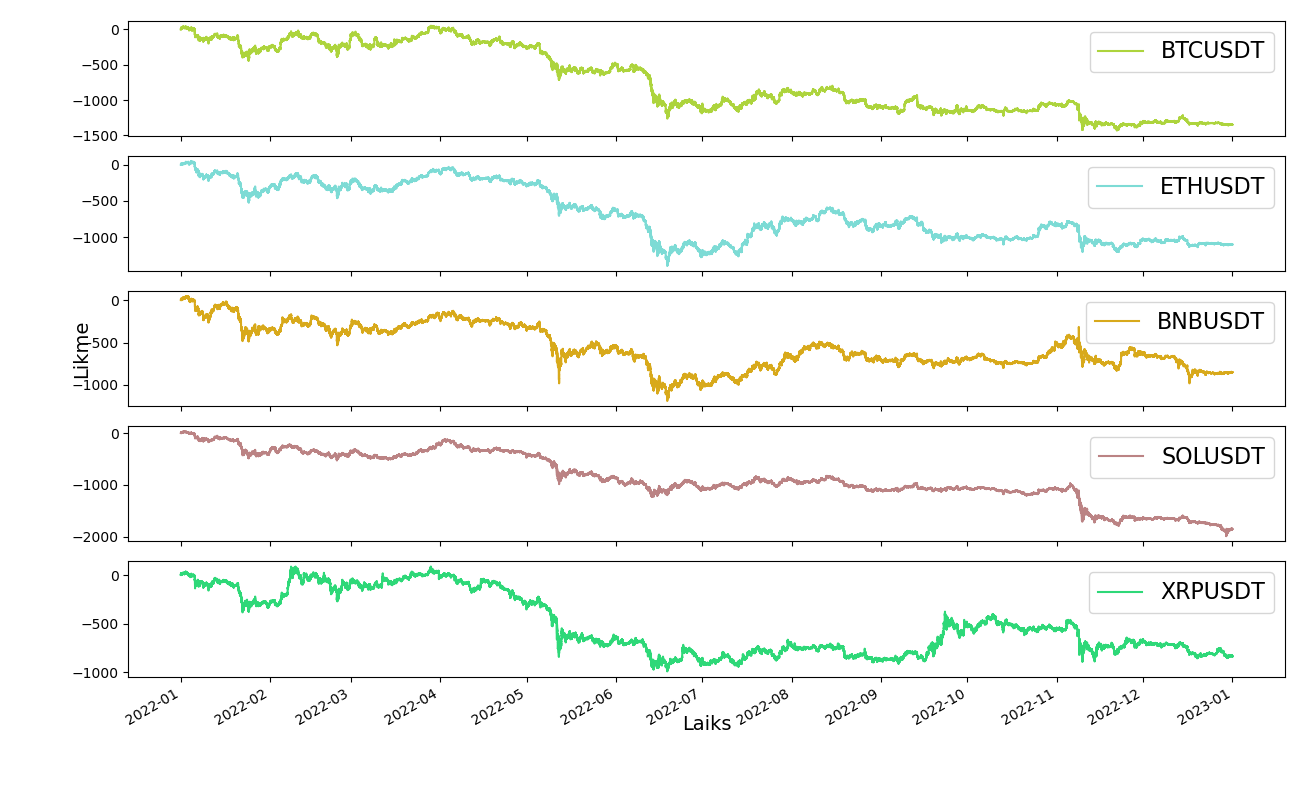

In [211]:
DataVisualizer.plot_long_range_data(df_1, tickers_1, 5)

In [237]:
# DataVisualizer.plot_log_exp(df_exp, tickers_exp)
# DataVisualizer.plot_raw_rate_invese()
# DataVisualizer.plot_log_rate_invese()

In [207]:
ts = '2022-07-29 00:00:00'
# ts = '2022-08-15 00:00:00'

df_exp['dtm'].loc[df_exp['dtm'] == ts]

300960   2022-07-29
Name: dtm, dtype: datetime64[ns]

## PCA variance analysis

In [7]:
factors_1, weights_1, variance_1 = DataProcessor.data_process_pca(df_1, tickers_1)
variance_rounded_1 = DataProcessor.variance_round(variance_1)

Variance plot for df_1

df_1 - preprocessed using log, derative and std normalization

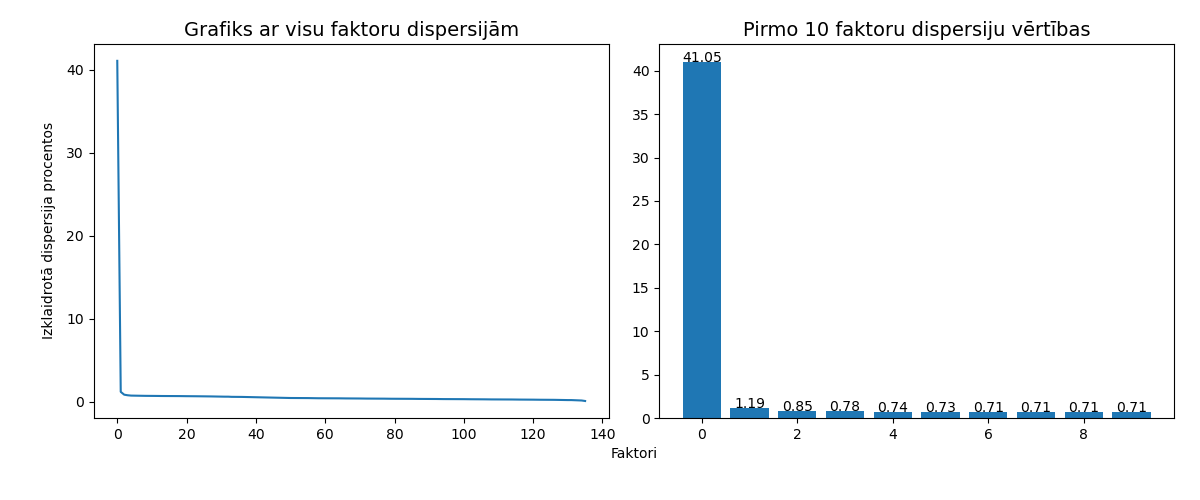

In [86]:
DataVisualizer.plot_variance(variance_rounded_1)

In [5]:
factors_2, weights_2, variance_2 = DataProcessor.data_process_pca(df_2, tickers_2)
variance_rounded_2 = DataProcessor.variance_round(variance_2)

Variance plot for df_2

df_2 - preprocessed using log and derative

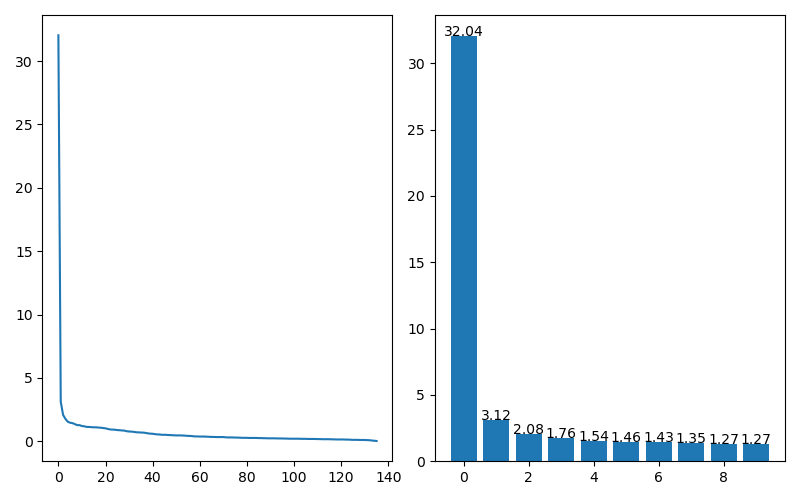

In [6]:
DataVisualizer.plot_variance(variance_rounded_2)

In [7]:
factors_3, weights_3, variance_3 = DataProcessor.data_process_pca(df_3, tickers_3)
variance_rounded_3 = DataProcessor.variance_round(variance_3)

Variance plot for df_3

df_3 - preprocessed only using log

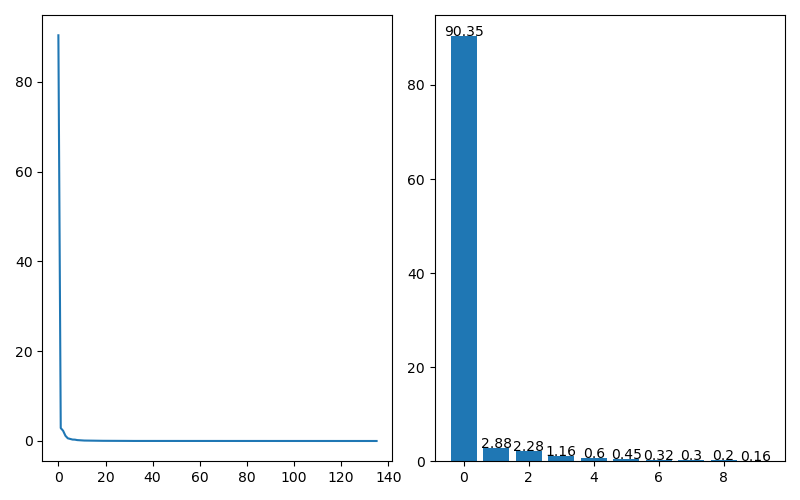

In [8]:
DataVisualizer.plot_variance(variance_rounded_3)

In [9]:
factors_4, weights_4, variance_4 = DataProcessor.data_process_pca(df_4, tickers_4)
variance_rounded_4 = DataProcessor.variance_round(variance_4)

Variance plot for df_4

df_4 - preprocessed using log and std

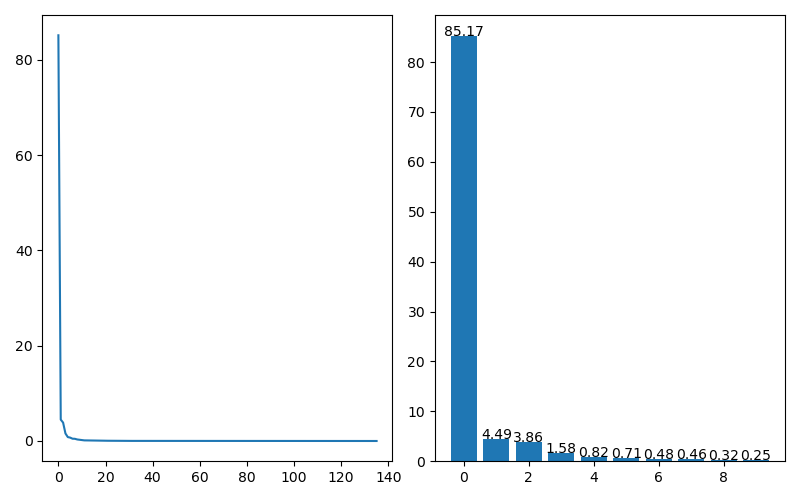

In [10]:
DataVisualizer.plot_variance(variance_rounded_4)

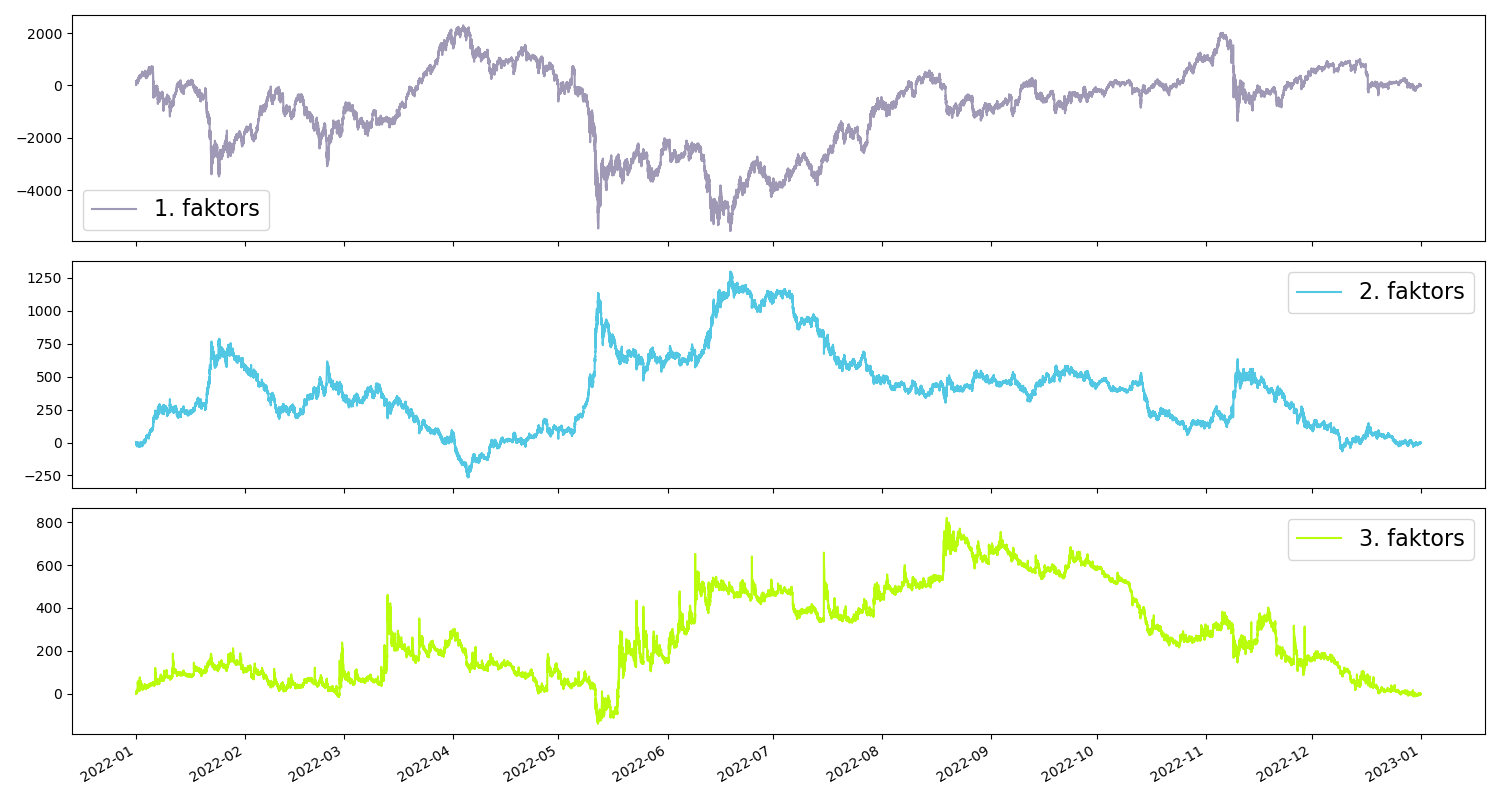

In [14]:
DataVisualizer.plot_pca_factors(df_1, factors_1, 3)

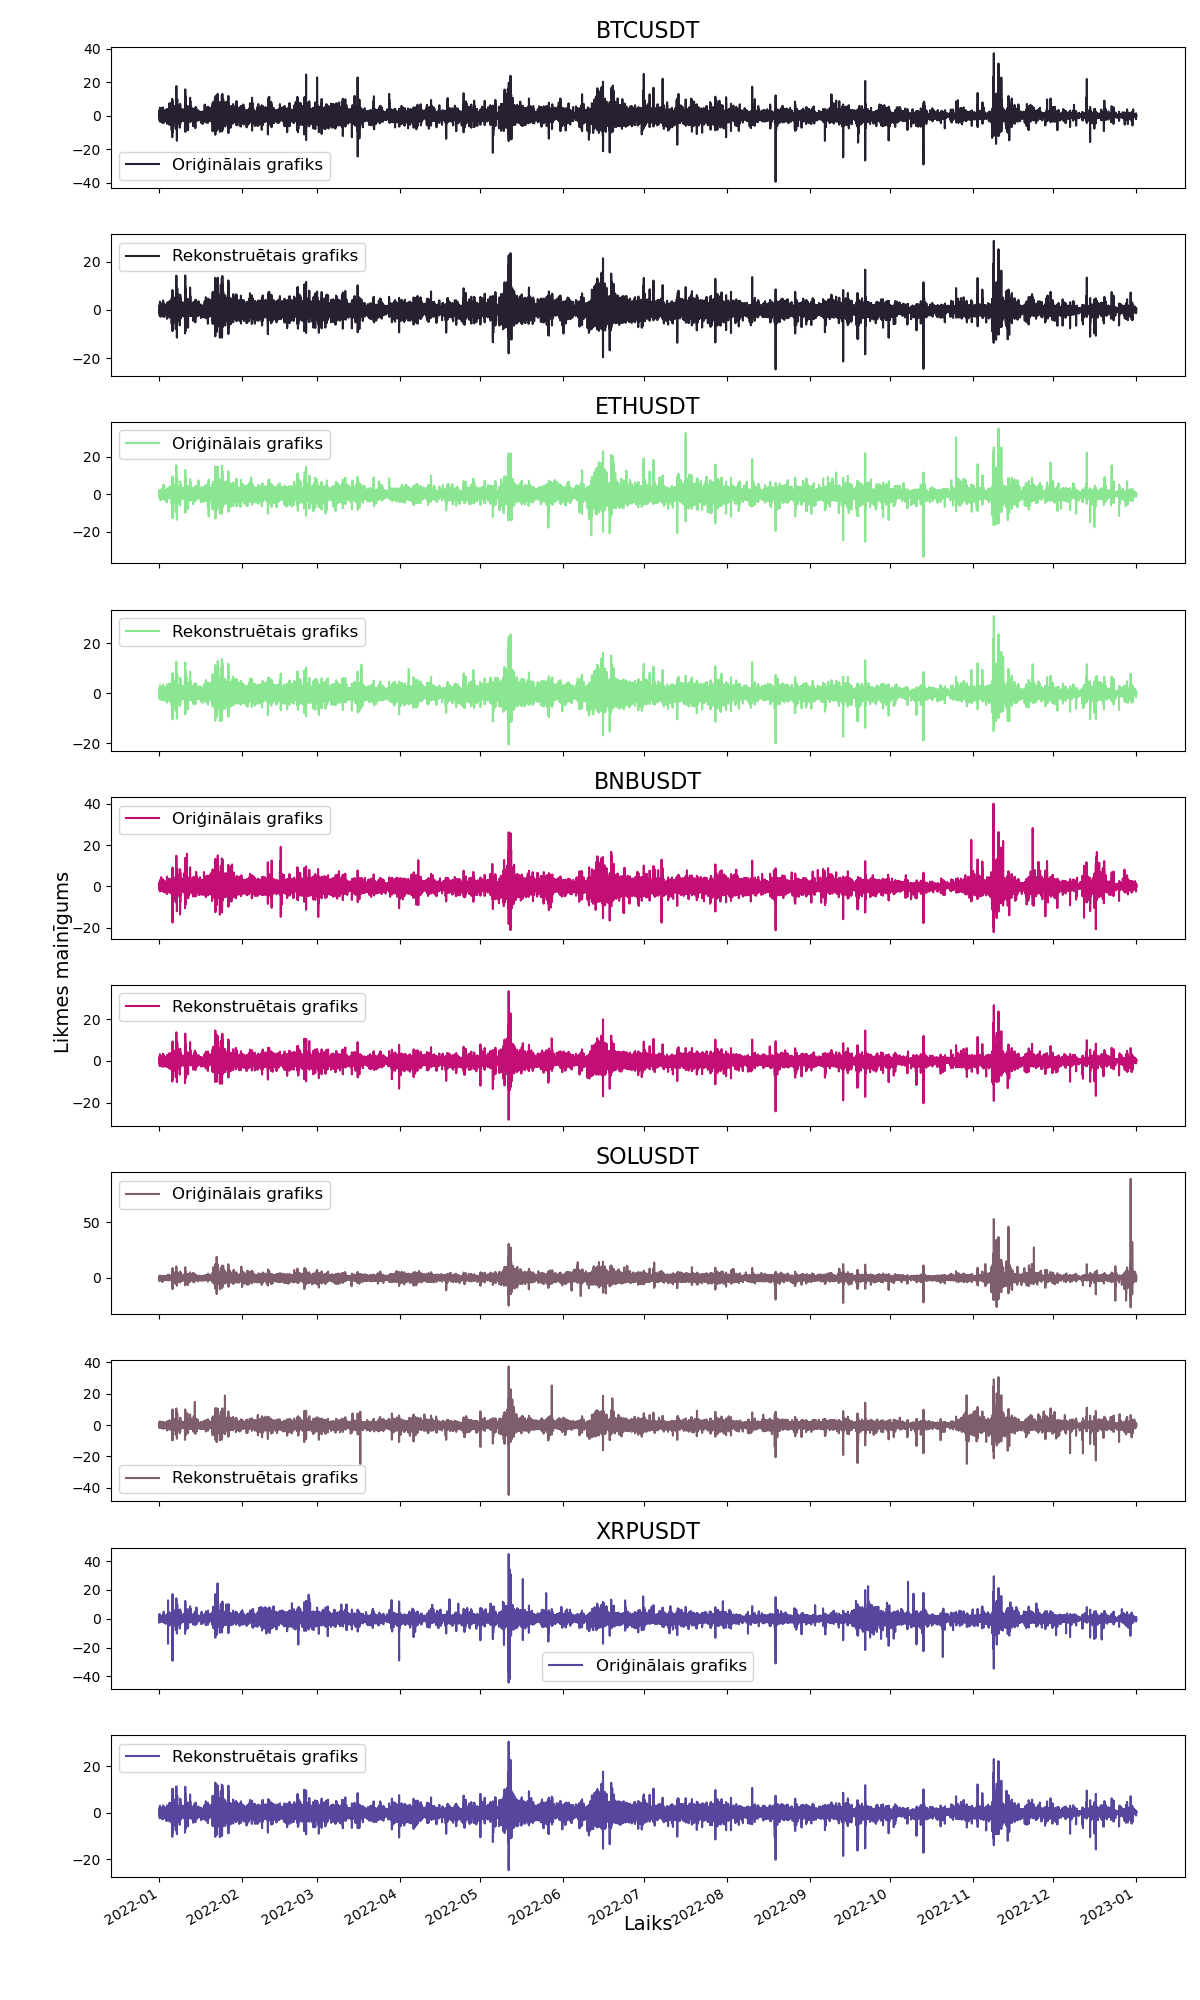

In [226]:
# 68 factors needed to achieve 80% variance
factor_cut = factors_1[:, :68]
weight_cut = weights_1[:68]
reconstructed_data = DataProcessor.data_reconstruct_pca(factor_cut, weight_cut)

DataVisualizer.plot_factor_reconstruction(df_1, reconstructed_data, tickers_1, 5)

/home/jovyan/work/Kristofers/modules/data_visualizer.py:270: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  @staticmethod


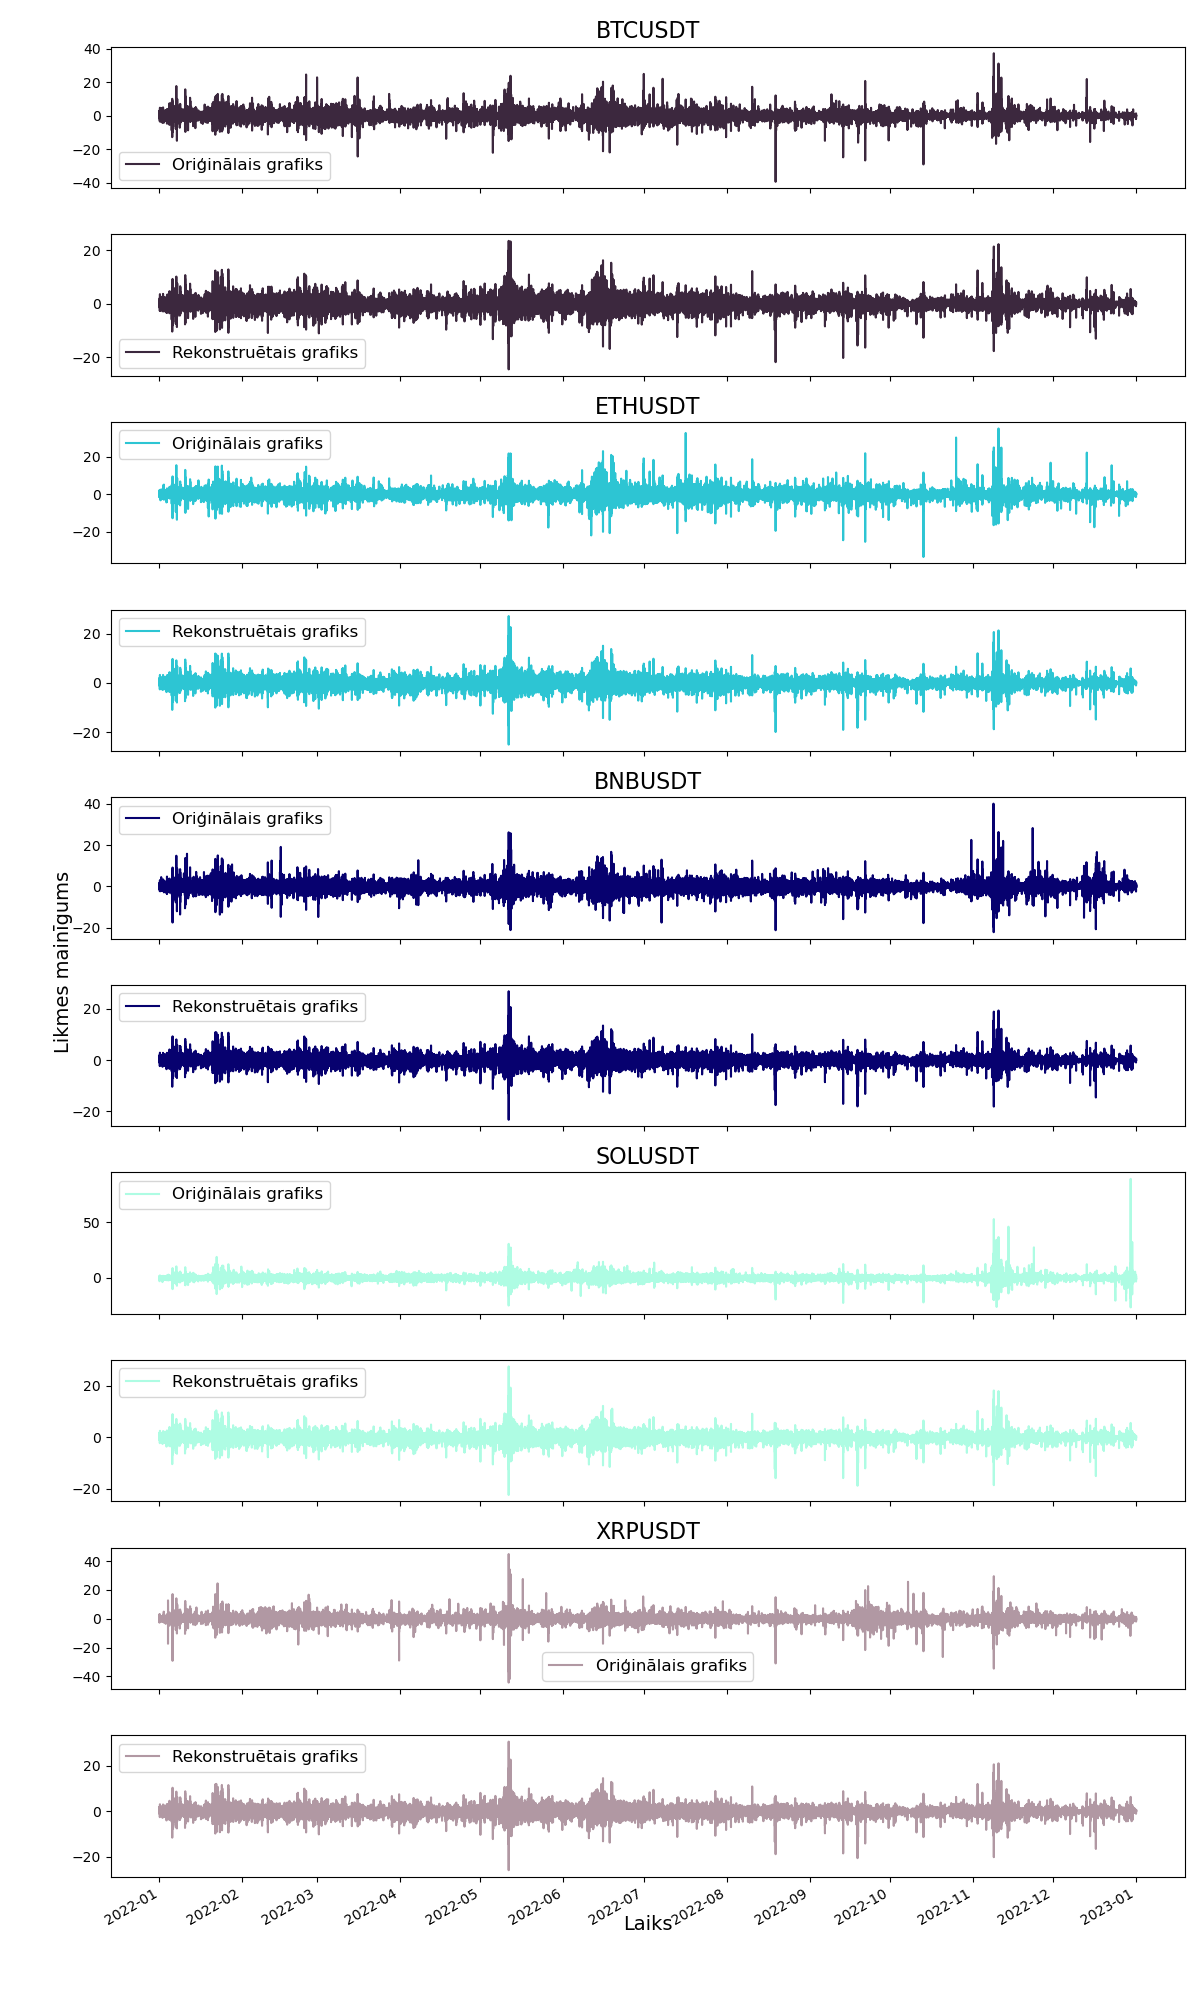

In [228]:
# 43% variance with 3 factors
factor_cut = factors_1[:, :3]
weight_cut = weights_1[:3]
reconstructed_data = DataProcessor.data_reconstruct_pca(factor_cut, weight_cut)

DataVisualizer.plot_factor_reconstruction(df_1, reconstructed_data, tickers_1, 5)

In [70]:
tickers_cut = tickers_1[50:]
factors_cut, weights_cut, variance_cut = DataProcessor.data_process_pca(df_1, tickers_cut)
variance_rounded_cut = DataProcessor.variance_round(variance_cut)

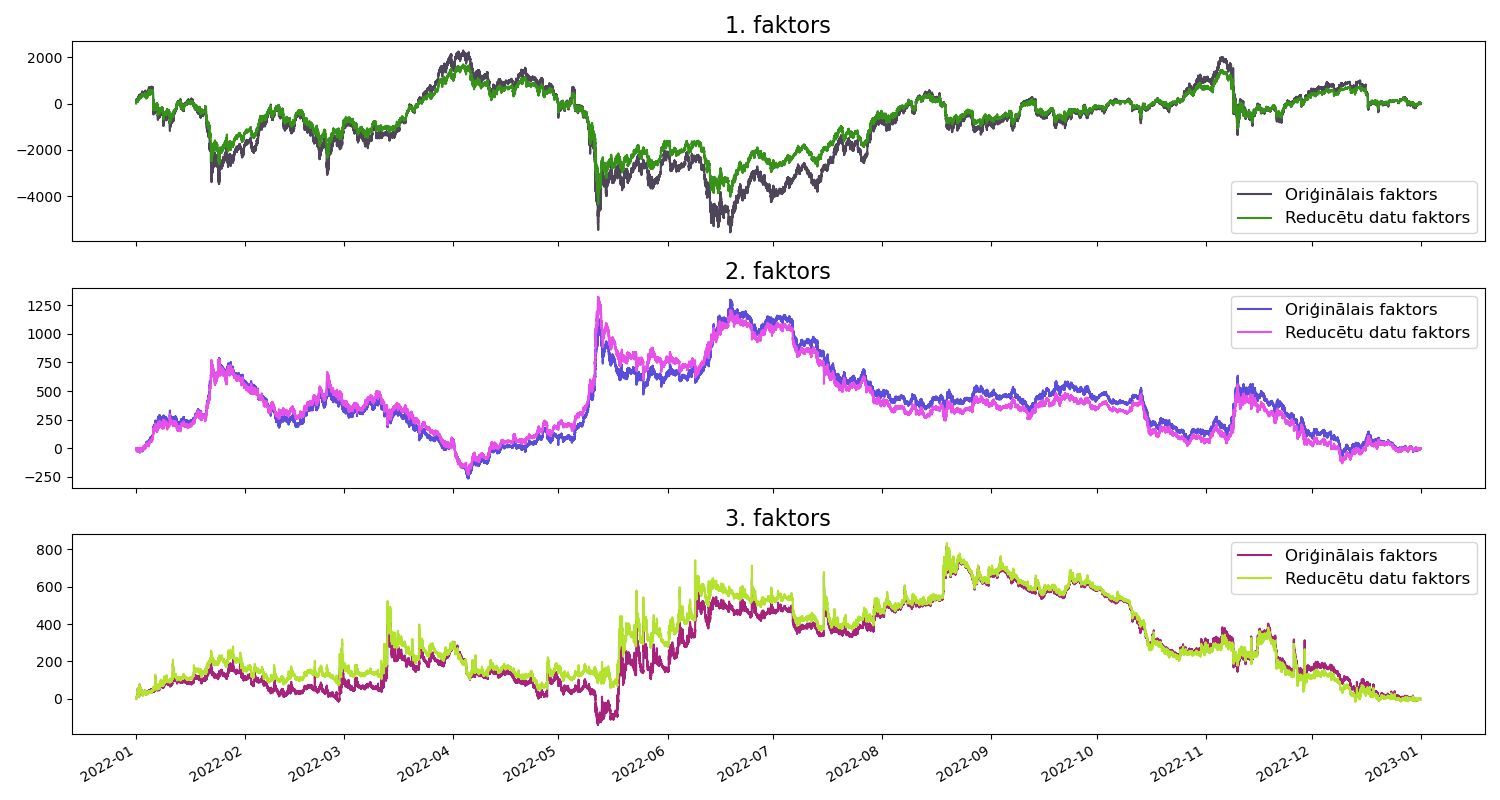

In [71]:
DataVisualizer.plot_coin_cut_factors(df_1['dtm'], factors_1, factors_cut, 3)